In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
import networkx as nx

# from auswertung_ma import f_exp, f_poly, f_poly_long
plot_output_path = r'D:\Uni\Masterarbeit\MA_Dokument\english\bilder'

In [2]:
# plot settings:
plot_output_path = r'D:\Uni\Masterarbeit\MA_Dokument\english\bilder'

markersize = 11
markerfacecolor = 'none'

label_fontsize = 20
capsize = 5
axislabelsize = 35

legendfontsize = 30

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
})

In [2]:
p_rsb = r"D:\Uni\Masterarbeit\Daten\rsb_test"

In [4]:
g = auswertung_ma.read_lgf_network(os.path.join(p_rsb, 'graph.lgf'))

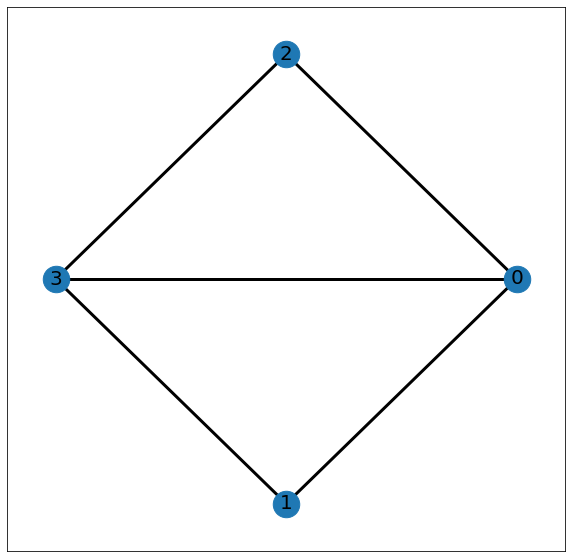

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(g)  # positions for all nodes
pos = nx.circular_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=700, ax=ax)
nx.draw_networkx_edges(g, pos, width=3, ax=ax)
nx.draw_networkx_labels(g, pos, font_size=20, font_family="sans-serif", ax=ax)
plt.show()
# nx.draw(G2)
# plt.draw()
# plt.savefig('fig')

In [14]:
sc = {0: np.array([3.39638, 6.57254, 0.104217, 3.98205, 6.91438]),
    1: np.array([7.06687, 7.65683, 0.745567, 8.83122, 4.69691]),
    2: np.array([3.61877, 5.54087, 2.44629, 1.81008, 1.28222]),
    3: np.array([0.351059, 8.85093, 1.33305, 4.32499, 8.91337]),
    4: np.array([8.55058, 9.04198, 6.97925, 0.181432, 9.18204])}

p = np.array([0.164094, 0.0964851, 0.34729, 0.0857501, 0.306381])

for s in sc:
    print(s, (sc[s] * p).sum())

0 3.687567125289
1 4.353650918275
2 2.526064281345
3 4.476300015158
4 7.5280993609012015


In [20]:
d_nachher = np.array([3.39638 + 3.61877 + 0.351059,
                6.57254 + 5.54087 + 7.65683,
                0.104217 + 0.745567 + 1.33305,
                0.181432 + 1.81008 + 3.98205,
                1.28222 + 6.91438 + 4.69691])

d_vorher = np.array([3.39638 + 3.61877, 6.57254 + 5.54087, 0.104217 + 0.745567, 0.181432 + 1.81008, 1.28222 + 6.91438])

In [19]:
0.289817 + (d_vorher * p).sum()

5.5869009424022

In [22]:
(d_nachher * p).sum()

8.3369207290962

In [7]:
p_rsb10 = r'D:\Uni\Masterarbeit\Daten\RSB\RSB_10_nodes_5_scenarios\TreePlusC_3.000000_c_10_nodes_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000\simulation_0'
p_orig = os.path.join(p_rsb10, 'original')
p_dist = os.path.join(p_rsb10, 'disturbed')

In [42]:
def read_edgemap(source):
    mInFile = open(source, mode='r')
    fileString = mInFile.read()
    mInFile.close()
    if '@arcs' in fileString:
        initKey = '@arcs'
        initPos = 6
    elif '@edges' in fileString:
        initKey = '@edges'
        initPos = 7
    else:
        print('No keyword \'@arcs\' or \'@edges\' found\n Wrong file format')
        return
    strDat = fileString[fileString.find(initKey)+initPos:].split("\n", 1)[1]
    
#     return strDat
    df = pd.DataFrame(columns=['u', 'v', 'id', 'first_stage'])
    
    rows = []
    for row in strDat.split('\n')[:-1]:
        s = row.split("\t")
        
        
        
        rows.append(pd.Series({'u': int(s[0]), 'v': int(s[1]), 'id': int(s[2]), 'first_stage': int(s[3])}).to_frame().T)
    return pd.concat(rows).set_index('id')

In [48]:
ro = read_edgemap(os.path.join(p_orig, '0.txt'))
rd = read_edgemap(os.path.join(p_dist, '0.txt'))
ro

,u,v,first_stage
id,,,
0,3,1,0
1,6,1,0
2,4,6,0
3,0,1,0
4,5,4,0
5,8,6,1
6,9,5,0
7,7,0,1
8,2,7,0


In [53]:
so = set(ro[ro['first_stage'] == 1].index)
sd = set(rd[rd['first_stage'] == 1].index)

In [54]:
so - sd

{7}

In [56]:
len(so)

3

In [59]:
# checken, ob im original und im disturbed ordner gleich viele Datein liegen

if not (len(os.listdir(p_orig)) == len(os.listdir(p_dist))):
    raise ValueError("ROBERTERROR: In den beiden Ordnern befinden sich nicht gleich viele Dateien!")
    
ds = []    
    
for i in range(len(os.listdir(p_orig))):
    ro = read_edgemap(os.path.join(p_orig, f'{i}.txt'))
    rd = read_edgemap(os.path.join(p_dist, f'{i}.txt'))
    
    so = set(ro[ro['first_stage'] == 1].index)
    sd = set(rd[rd['first_stage'] == 1].index)
    
    if len(so) > 0:
    
        d = len(so - sd) / len(so)
        ds.append(d)

In [60]:
len(ds)

19980

In [61]:
dd = np.array(ds)
print(dd.mean())
print(dd.std())

0.24690931010375455
0.11778020901392984


In [66]:
ds.insert(2, 'None')

In [68]:
pd.DataFrame(ds, columns=['d'])

,d
0,0.333333
1,0.166667
2,None
3,0.166667
4,0.2
...,...
19976,0.166667
19977,0.2
19978,0.25
19979,0.333333


In [69]:
pr = r"D:\Uni\Masterarbeit\Daten\RSB\Vorauswertungen\RSB_10_nodes_5_scenarios\results.txt"

In [83]:
df = pd.read_csv(pr, index_col='run')
df.rename(columns={' original': 'original', ' disturbed': 'disturbed'}, inplace=True)

In [84]:
df.columns

Index(['original', 'disturbed'], dtype='object')

In [87]:
(df['disturbed'] - df['original']) / df['original']

run
0        0.120869
1        0.034176
2        0.167836
3        0.068909
4        0.035644
           ...   
19995    0.177633
19996    0.195372
19997    0.228491
19998    0.157083
19999    0.133316
Length: 20000, dtype: float64

In [95]:
# df[df['original'] == df['disturbed']]

In [132]:
class RSB:
    
    p = r"D:\Uni\Masterarbeit\Daten\RSB\Vorauswertungen"
    
    def __init__(self, k):
        self.k = k
        self.ns = []
        self.res_comp = []
        self.delta_res_comp = []
        
        self.d = []
        self.delta_d = []
        
        for f in os.listdir(self.p):
            
            s = f.split('_')
            n, k = int(s[1]), int(s[3])

            if k == self.k:
                self.ns.append(n)
                
                df = pd.read_csv(os.path.join(self.p, f, 'results.txt'), index_col='run')
                df.rename(columns={' original': 'original', ' disturbed': 'disturbed'}, inplace=True)
                
                comp = (df['disturbed'] - df['original']) / df['original']
                self.res_comp.append(comp.mean())
                
                # berechne standardfehler
                self.delta_res_comp.append(comp.std() / np.sqrt(comp.shape[0]))
                
                df_d = pd.read_csv(os.path.join(self.p, f, 'd.txt'), index_col='Unnamed: 0', na_values='None')
                
                df_d_subset = df_d.dropna(subset=['d'])
                
                self.d.append(df_d_subset['d'].mean())
                self.delta_d.append(df_d_subset['d'].std() / np.sqrt(df_d_subset.shape[0]))

In [135]:
rsb5 = RSB(5)

In [ ]:

    ax.errorbar(d.index, d[alg], yerr=smes[alg], fmt=fmts[i], markersize=8, markerfacecolor='none', capsize=4, label=f'{algs[alg]}')

# ax.set_xlim([0.4, 0.6])
# ax.set_ylim([50, 60])

# ax.vlines(0.6355444309347226, 0, 520, color='black')




In [138]:
rsbs = {5: rsb5}

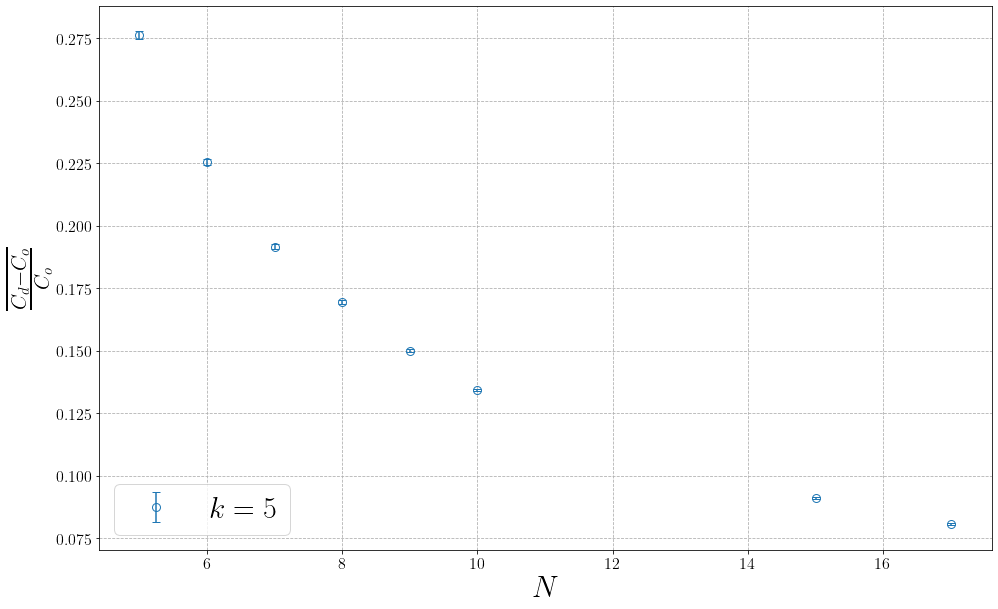

In [156]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

for i, k in enumerate(rsbs):

    ax.errorbar(rsbs[k].ns, rsbs[k].res_comp, yerr=rsbs[k].delta_res_comp, fmt=fmts[i], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label=f'$k = {k}$')

ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \overline{\frac{C_{d} - C_o}{C_o}}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')    

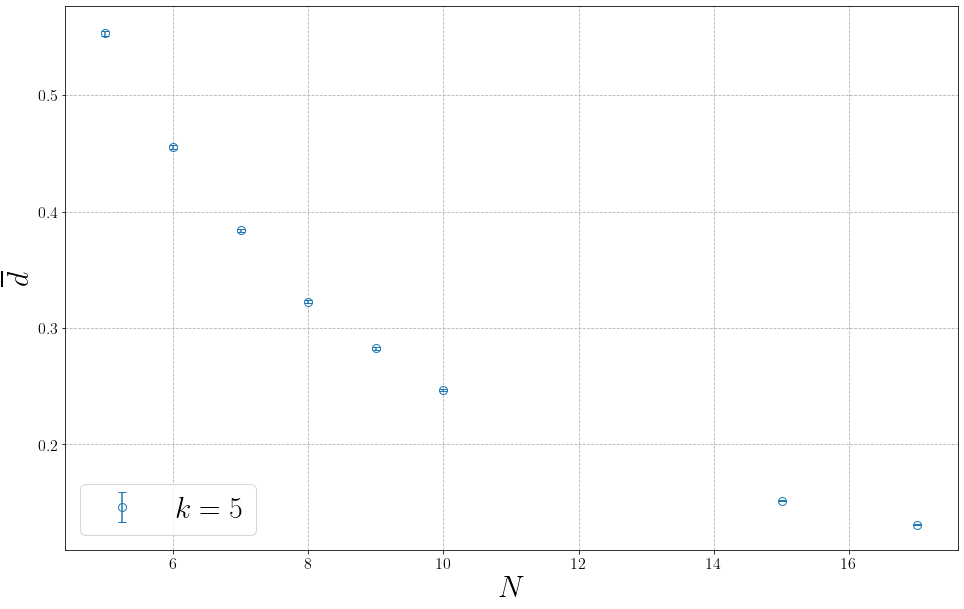

In [155]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

for i, k in enumerate(rsbs):

    ax.errorbar(rsbs[k].ns, rsbs[k].d, yerr=rsbs[k].delta_d, fmt=fmts[i], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label=f'$k = {k}$')
    
ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \overline{d}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30, loc='lower left')   

In [166]:
np.random.randint([10,10, 10, 10, 10, 10, 10, 10])

array([7, 0, 5, 6, 0, 4, 8, 9])

# Mache hier auch BnB Analyse

In [9]:
def calc_total_number(N):
    
    s = 0
    
    for i in range(N):
        s += special.comb(special.comb(N, 2), i)
    
    return s

In [10]:
def fit_func(N, a):
    return np.exp(a * N * np.log(N))

In [11]:
def fit_func2(N, a):
    return 2 ** (a * N ** 2)

In [53]:
def fit_func3(N, a):
    return np.exp(N * np.log(N) + (1 - np.log(2))* N + a * np.log(N))

In [13]:
def fit_func4(N, a):
    return 2 ** (a * N)

In [94]:
def fit_func_alles(N, a, b, c):
    return np.exp(a * N * np.log(N) + N * b + c * np.log(N))

In [74]:
ns = np.arange(3, 30)
ts = [calc_total_number(n) for n in ns] 

subset_index = 40

popt, pcov = curve_fit(fit_func, ns[:subset_index], ts[:subset_index], maxfev=100000)
print(popt[0])

popt2, pcov2 = curve_fit(fit_func2, ns[:subset_index], ts[:subset_index], maxfev=100000)
print(popt2[0])

popt3, pcov3 = curve_fit(fit_func3, ns[:subset_index], ts[:subset_index], maxfev=100000)
print(popt3[0])

1.0180258821831165
0.1705362737208854
-2.1199373670956168


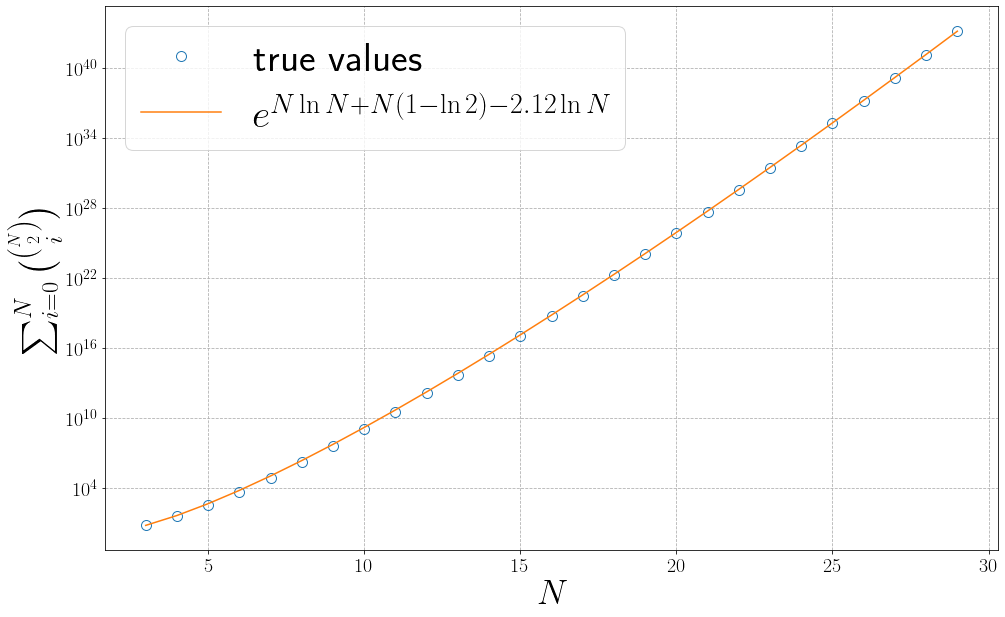

In [75]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

ax.plot(ns, ts, 'o', label=f'true values', markersize=markersize, markerfacecolor=markerfacecolor)

# ax.scatter(ns, fit_func(ns, popt[0]), label=f'fit1')
# ax.scatter(ns, fit_func2(ns, popt2[0]), label=f'fit2')
ax.plot(ns, fit_func3(ns, popt3[0]), label=f'$e^{{N \\ln N+ N(1-\\ln 2)- {-1*popt3[0]:.3} \\ln N}}$')


# ax.errorbar(rsbs[k].ns, rsbs[k].d, yerr=rsbs[k].delta_d, fmt=fmts[i], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label=f'$k = {k}$')
    
ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'$\sum_{i=0}^N {{N \choose 2} \choose i}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=40)  
ax.set_yscale('log')

# ax.set_xlim((28, 30))
plt.savefig(os.path.join(plot_output_path, 'summe_e0_theorie.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [3]:
p = r"D:/Uni/Masterarbeit/Daten/optimum_vs_optimum/BnB_9_nodes_5_scenarios/"

print(os.listdir(p))

kp = os.path.join(p, os.listdir(p)[0])

df = auswertung_ma.read_tracking_files(kp, "aaah")

['FullyConnected_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000']


In [4]:
df.mean()

loop_counter        5566.710000
total_optimum[s]       0.339386
dtype: float64

In [7]:
df.std() / np.sqrt(df.shape[0])

loop_counter        58.150219
total_optimum[s]     0.003265
dtype: float64

In [8]:
df.size

20000

In [59]:
pp = r"D:/Uni/Masterarbeit/Daten/optimum_vs_optimum/BnB_9_nodes_5_scenarios/FullyConnected_5_RandomScenarioCreator_RandomTestCreator_0.000000_10.000000/simulation_0/Tracking/"
b = np.loadtxt(os.path.join(pp, 'total_optimum2_s.txt'))

In [60]:
b

array([0.0861673, 0.0761634, 1.75156  , ..., 0.678501 , 1.34099  ,
       0.29296  ])

In [71]:
sorted([f for f in os.listdir(p) if "BnB_" in f], key=lambda o: int(o.split('_')[1]))

['BnB_5_nodes_5_scenarios',
 'BnB_6_nodes_5_scenarios',
 'BnB_7_nodes_5_scenarios',
 'BnB_8_nodes_5_scenarios',
 'BnB_9_nodes_5_scenarios',
 'BnB_10_nodes_5_scenarios']

In [84]:
data = {}
p = r"D:/Uni/Masterarbeit/Daten/optimum_vs_optimum"

ns_measure = []
ts_measure = []
delta_ts_measure = []

rts = []
delta_rts = []

# bnb ordner nach n sortieren
bnb_ordner = sorted([f for f in os.listdir(p) if "BnB_" in f], key=lambda o: int(o.split('_')[1]))


for ho in bnb_ordner:
#     print(ho)
    if 'BnB_' in ho:
        n = int(ho.split("_")[1])
        ns_measure.append(n)
        
#         print(n)
        
        kp = os.path.join(p, ho, os.listdir(os.path.join(p, ho))[0])
        
        # lese optimum_loop_counter2.txt
        a = np.loadtxt(os.path.join(kp, 'simulation_0', 'Tracking', 'optimum_loop_counter2.txt'))
        
        b = np.loadtxt(os.path.join(kp, 'simulation_0', 'Tracking', 'total_optimum2_s.txt'))
        
        ts_measure.append(a.mean())
        delta_ts_measure.append(a.std() / np.sqrt(a.shape[0]))
        
        rts.append(b.mean())
        delta_rts.append(b.std() / np.sqrt(b.shape[0]))
#         df = auswertung_ma.read_tracking_files(kp, "aaah")

In [85]:
ns_measure[:5]

[5, 6, 7, 8, 9]

In [95]:
subset_index = 50

popt, pcov = curve_fit(fit_func, ns_measure[:subset_index], ts_measure[:subset_index], maxfev=100000)
print(popt[0])

popt2, pcov2 = curve_fit(fit_func2, ns_measure[:subset_index], ts_measure[:subset_index], maxfev=100000)
print(popt2[0])

popt3, pcov3 = curve_fit(fit_func3, ns_measure[:subset_index], ts_measure[:subset_index], maxfev=100000)
print(popt3[0])

popt4, pcov4 = curve_fit(fit_func4, ns_measure[:subset_index], ts_measure[:subset_index], maxfev=100000)
print(popt4[0])

popta, pcova = curve_fit(fit_func_alles, ns_measure[:subset_index], ts_measure[:subset_index], maxfev=100000, bounds=([0, 0, 0], [np.inf, np.inf, np.inf]))
print(popta[0], popta[1], popta[2])

0.4060262044735252
0.11562523437400629
-9.277790041642664
1.4987520704958193
0.17642659926832613 0.5878782589314405 2.7213252745720324e-15


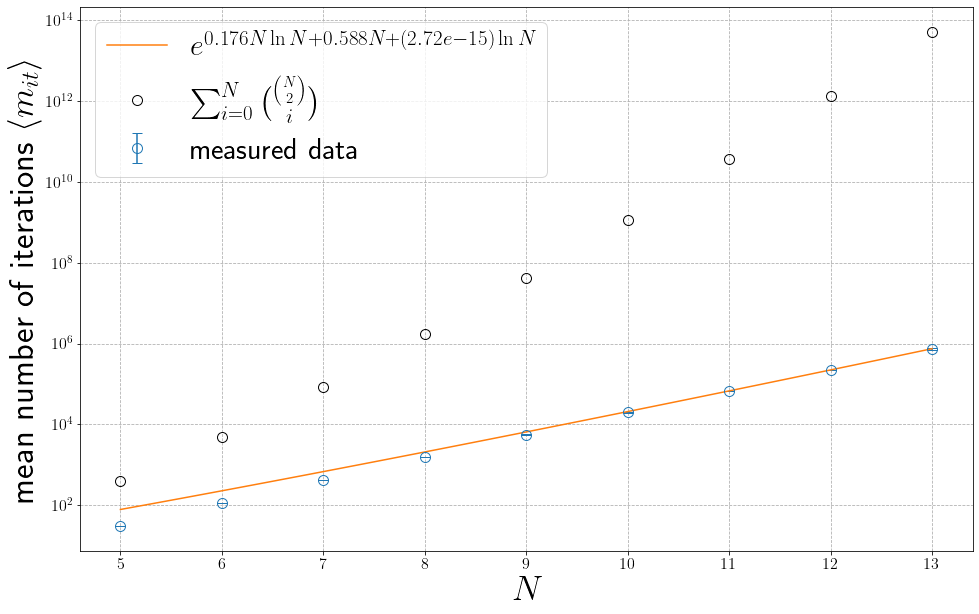

In [99]:
fig, ax = plt.subplots(figsize=(16, 10))

# markersize = 10

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

ax.errorbar(ns_measure, ts_measure, yerr=delta_ts_measure, fmt=fmts[0], markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label='measured data')
# ax.scatter(ns_measure, fit_func(np.array(ns_measure), popt[0]), label='fit 1')

# ax.scatter(ns_measure, fit_func2(np.array(ns_measure), popt2[0]), label='fit 2')
# ax.scatter(ns_measure, fit_func3(np.array(ns_measure), popt3[0]), label='fit 3')
# ax.scatter(ns_measure, fit_func4(np.array(ns_measure), popt4[0]), label='fit 4')

nss = np.linspace(5, 13, 100)

ax.plot(nss, fit_func_alles(np.array(nss), *popta), '-', markersize=markersize, markerfacecolor=markerfacecolor, label=f'$e^{{{popta[0]:.3} N \\ln N+ {popta[1]:.3} N+ ({popta[2]:.3}) \\ln N}}$')

ax.plot(ns[2:11], ts[2:11], 'o', c='black', markersize=markersize, markerfacecolor=markerfacecolor, label='$\sum_{i=0}^N {{N \choose 2} \choose i}$')


ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'mean number of iterations $\langle m_{it} \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.legend(fontsize=30)  
ax.set_yscale('log')

# ax.set_xlim((28, 30))
plt.savefig(os.path.join(plot_output_path, 'summe_e0_bnb.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

Fit 2, also $2^{\alpha N^2}$ sklaiert zu schnell
Fit 3 auch

In [91]:
subset_index = 5

popt, pcov = curve_fit(fit_func, ns_measure[:subset_index], 1000 * np.array(rts[:subset_index]), maxfev=100000)
print(popt[0])

popt2, pcov2 = curve_fit(fit_func2, ns_measure[:subset_index], 1000 *np.array(rts[:subset_index]), maxfev=100000)
print(popt2[0])

popt3, pcov3 = curve_fit(fit_func3, ns_measure[:subset_index], 1000 *np.array(rts[:subset_index]), maxfev=100000)
print(popt3[0])

popt4, pcov4 = curve_fit(fit_func4, ns_measure[:subset_index], 1000 *np.array(rts[:subset_index]), maxfev=100000)
print(popt4[0])

0.2921705943468419
0.10366083098949992
-7.598310590334937
0.9101877025611452


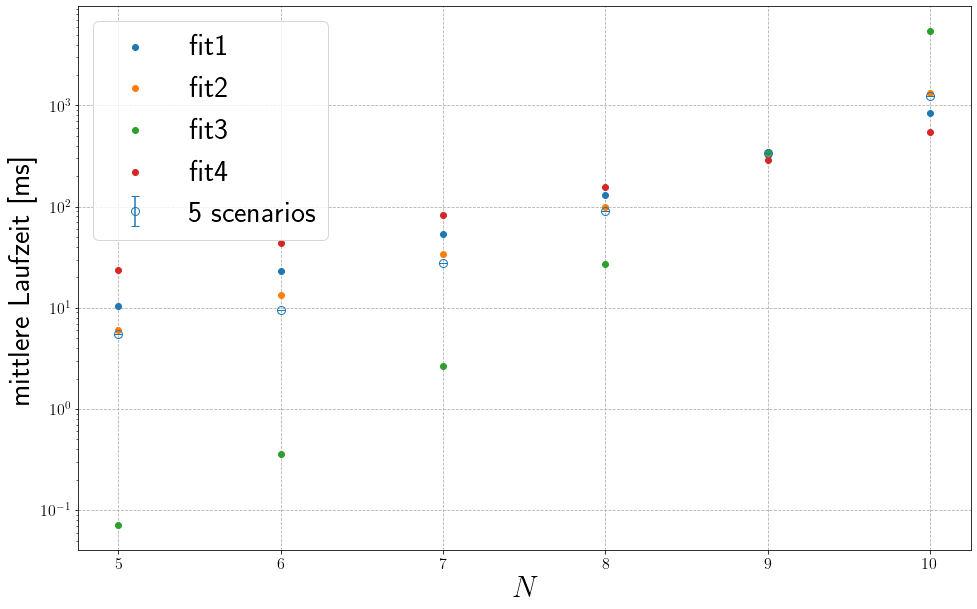

In [95]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

# ax.scatter(ns_measure, rts, label=f'true values')
ax.scatter(np.array(ns_measure), fit_func(np.array(ns_measure), popt[0]), label=f'fit1')
ax.scatter(np.array(ns_measure), fit_func2(np.array(ns_measure), popt2[0]), label=f'fit2')
ax.scatter(np.array(ns_measure), fit_func3(np.array(ns_measure), popt3[0]), label=f'fit3')
ax.scatter(np.array(ns_measure), fit_func4(np.array(ns_measure), popt4[0]), label=f'fit4')

ax.errorbar(np.array(ns_measure), 1000* np.array(rts), yerr=delta_rts, fmt=fmts[0], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label='5 scenarios')


# ax.errorbar(rsbs[k].ns, rsbs[k].d, yerr=rsbs[k].delta_d, fmt=fmts[i], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label=f'$k = {k}$')
    
ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'mittlere Laufzeit [ms]', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.legend(fontsize=30)  
ax.set_yscale('log')

# ax.set_xlim((1, 10))
# ax.set_ylim((1, 10e12))